# Exercise 1

## Fundamentals of Simulation Methods

#### Author:    Elias Olofsson

#### Version information:
        2020-11-20: v.1.0. First public release. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1.1 - Data creation and Visualization (7 pts)

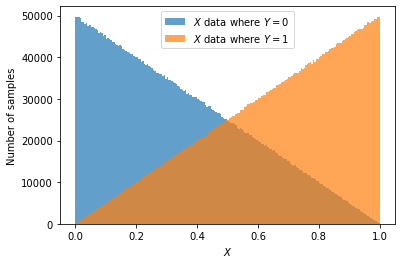

In [2]:
def inversion_y0(x):
    return 1-np.sqrt(1-x)
    
def inversion_y1(x):
    return np.sqrt(x)

# Generate N pairs of feature data X and labels Y.
def create_data(N):
    # Generate random labels {0,1} with equal probability.
    y = np.random.randint(2, size=N)
    
    # Draw random numbers from the standard flat distribution on [0,1].
    x_rand = np.random.random(N)
    
    # Preallocate array for X data.
    x = np.zeros_like(x_rand)
    
    # Filter out values where Y == 0 or 1, and apply the corresponding analytical
    # probability inversion to transfer values into each new distribution.
    x[y==0] = inversion_y0(x_rand[y==0])
    x[y==1] = inversion_y1(x_rand[y==1])

    return np.concatenate([[x], [y]]).T

# Test that the create_data() function works correctly.
N = 10**7
data = create_data(N)
mask_y0 = data[:,1]==0
mask_y1 = data[:,1]==1
plt.hist(data[mask_y0,0], bins=200, alpha=0.7, label="$X$ data where $Y = 0$")
plt.hist(data[mask_y1,0], bins=200, alpha=0.7, label="$X$ data where $Y = 1$")
plt.legend()
plt.xlabel("$X$")
plt.ylabel("Number of samples")
plt.savefig("data_creation.pdf", format='pdf', bbox_inches='tight')

## Exercise 1.2 - Classification by Thresholding (5 pts)

In [3]:
# Defining threshold classifiers A and B
def ruleA(x,t):
    predict = np.zeros_like(x)
    predict[x<t] = 0
    predict[x>=t] = 1
    return predict

def ruleB(x,t):
    return 1-ruleA(x,t)

# Calculate the error rate for the given data, classification rule and threshold.
def error_test(data,rulefunc,threshold):
    # Get 
    y_predicted = rulefunc(data[:,0], threshold)

    correct_predictions =  sum(y_predicted == data[:,1])
    samplesize = np.size(data, axis=0)
    error_rate = 1 - correct_predictions/samplesize
    
    return error_rate

# Function to experimentally test a set of classification rules given sets of various parameters.
def exp_test(M,N,Thresholds,rule_list):
    error = np.zeros(N) # Preallocation
    print(f"""Experimentally testing the predicted error rates for the set thresholds, sample sizes and classification rules. 
    Currently averaging over {N} datasets for each sample size.\n\n""")
    for rule_func in rule_list:
        fname = rule_func.__name__
        print(f"Rule {fname[-1]}:")
        for xt in Thresholds:
            print(f"    Threshold: {xt}")
            for m in M:
                print(f"        Sample size: {m}")
                for i in range(N):
                    data = create_data(m)
                    error[i] = error_test(data,rule_func,xt)
                
                avg_err = np.average(error)
                std_err = np.std(error)
                
                print(f"        Avg error rate: {avg_err:<6.4}, Std: {std_err:<6.4}\n")


# Settings
M = [10, 100, 1000, 10000]      # Sample sizes
N = 10                          # No. of tests per sample size.
Thresholds = [0.2, 0.5, 0.6]    # Thresholds to test.
rule_list = [ruleA, ruleB]      # Specifiy the rules to use.

# Execute the test
exp_test(M,N,Thresholds,rule_list)


Experimentally testing the predicted error rates for the set thresholds, sample sizes and classification rules. 
    Currently averaging over 10 datasets for each sample size.


Rule A:
    Threshold: 0.2
        Sample size: 10
        Avg error rate: 0.29  , Std: 0.13  

        Sample size: 100
        Avg error rate: 0.318 , Std: 0.036 

        Sample size: 1000
        Avg error rate: 0.3502, Std: 0.01103

        Sample size: 10000
        Avg error rate: 0.3389, Std: 0.003812

    Threshold: 0.5
        Sample size: 10
        Avg error rate: 0.31  , Std: 0.1221

        Sample size: 100
        Avg error rate: 0.243 , Std: 0.03743

        Sample size: 1000
        Avg error rate: 0.2565, Std: 0.009511

        Sample size: 10000
        Avg error rate: 0.2504, Std: 0.0056

    Threshold: 0.6
        Sample size: 10
        Avg error rate: 0.25  , Std: 0.1565

        Sample size: 100
        Avg error rate: 0.254 , Std: 0.03639

        Sample size: 1000
        Avg error rat

## Exercise 1.3 - Baseline Classifiers (2 pts)

In [4]:
def ruleC(x):
    predict = np.random.randint(2, size=x.shape)
    return predict

def ruleD(x):
    predict = np.ones(x.shape)
    return predict

M = [10, 100, 1000, 10000]


